# What's in an Avocado Toast ?: A Supply Chain Analysis

You're in London, making an avocado toast, a quick-to-make dish that has soared in popularity on breakfast menus since the 2010s. A simple smashed avocado toast can be made with five ingredients: one ripe avocado, half a lemon, a big pinch of salt flakes, two slices of sourdough bread and a good drizzle of extra virgin olive oil. It's no small feat that most of these ingredients are readily available in grocery stores.

In this project, I conducted a supply chain analysis of three of these ingredients used in an avocado toast, utilizing the Open Food Facts database. This database contains extensive, openly-sourced information on various foods, including their origins. Through this analysis, I gained an in-depth understanding of the complex supply chain involved in producing a single dish.

The main goal of this project was reusing functionality to perform similar tasks on different datasets.Therefore to create reusable code for repetitive tasks in data analysis.

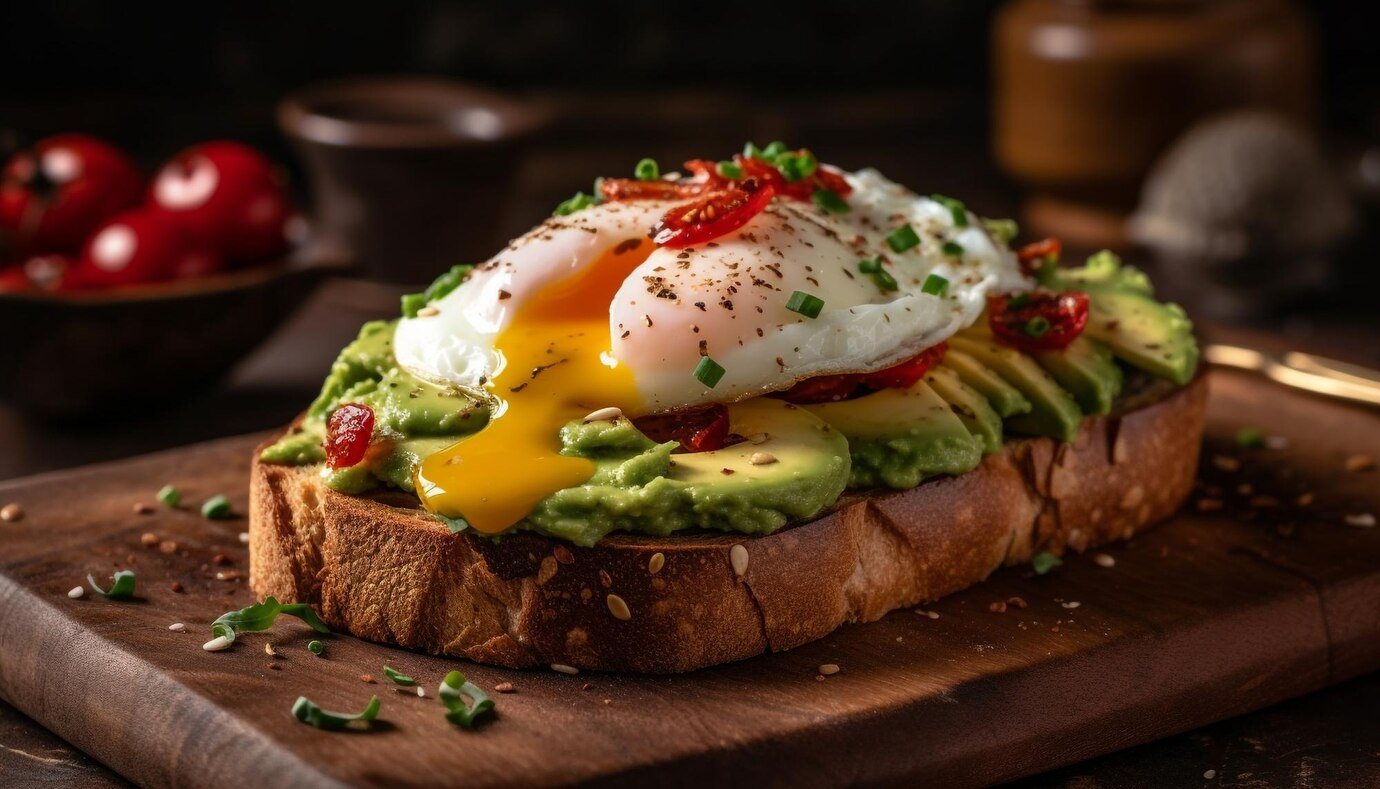

Image credits : <a href="https://www.freepik.com/free-ai-image/toasted-ciabatta-with-grilled-meat-avocado-generative-ai_47211749.htm#fromView=search&page=1&position=5&uuid=a361a2b2-4483-4de0-afca-04fe052a7e0e">Image by vecstock on Freepik</a>y



### Data Reading and Preparation
- **Reading the Data:** The dataset is loaded from a tab-delimited CSV file into a pandas DataFrame.
- **Subsetting Columns:** Only a select group of columns relevant to the analysis is retained.

In [ ]:
# Importing required libraries
import pandas as pd

## Reading and Preparing the Dataset
# Loading the dataset from a tab-delimited file into a DataFrame named 'food_data'
food_data = pd.read_csv('/avocado.csv', sep='\t')


# Temporarily read data without specifying dtypes
food_data = pd.read_csv('/avocado.csv', sep='\t', dtype=str)


# Selecting a specific set of columns for analysis
columns_of_interest = ['code', 'lc', 'product_name_en', 'quantity', 'serving_size',
                       'packaging_tags', 'brands', 'brands_tags', 'categories_tags',
                       'labels_tags', 'countries', 'countries_tags', 'origins', 'origins_tags']
food_data = food_data[columns_of_interest]


### Category Analysis
- **Gathering Categories:** Categories relevant to avocados are read from a text file.
- **Filtering Based on Categories:** The dataset is filtered to include only those entries that match the relevant categories.

In [ ]:
## Gathering Categories
with open("/relevant_avocado_categories.txt", "r") as cat_file:
    avocado_cats = cat_file.read().splitlines()

## Filtering Based on Categories
food_data['cat_list'] = food_data['categories_tags'].str.split(',')
food_data.dropna(subset=['cat_list'], inplace=True)
food_data = food_data[food_data['cat_list'].apply(lambda cat_list: any(cat in avocado_cats for cat in cat_list))]


### Origin Analysis
- **Focusing on the UK Market:** Analysis is narrowed down to products sold in the United Kingdom.
- **Determining Origins:** The most common countries of origin for each product category are identified.

In [ ]:
## Focusing on the UK Market
uk_food_data = food_data[food_data['countries'] == 'United Kingdom']

## Determining Origins
most_common_origin = uk_food_data['origins_tags'].value_counts().idxmax().lstrip("en:")

### Automation via Function
- A function is defined to automate the process of reading data, filtering based on categories, and identifying the top country of origin for any given ingredient.


In [ ]:
def analyze_origin(file_path, relevant_cats):
    # Reading the specified data file into a pandas DataFrame
    data_frame = pd.read_csv(file_path, sep='\t')

    # Keeping only a subset of columns that are relevant for the analysis
    data_frame = data_frame[columns_of_interest]

    # Splitting the 'categories_tags' column values into lists for easier filtering
    data_frame['category_lists'] = data_frame['categories_tags'].str.split(',')

    # Dropping rows where 'category_lists' is null to ensure data completeness
    data_frame.dropna(subset=['category_lists'], inplace=True)

    # Filtering the DataFrame to include only rows where the 'category_lists' contains
    # at least one of the relevant categories specified for the analysis
    data_frame = data_frame[data_frame['category_lists'].apply(lambda lst: any(item in relevant_cats for item in lst))]

    # Isolating data for products sold in the United Kingdom
    uk_data = data_frame[data_frame['countries'] == 'United Kingdom']

    # Identifying the most common origin country for the food item among the UK data
    primary_origin_string = uk_data['origins_tags'].value_counts().idxmax()

    # Cleaning up the origin country string by stripping the "en:" prefix and replacing hyphens with spaces
    primary_origin_country = primary_origin_string.lstrip("en:").replace('-', ' ')

    # Printing the top origin country for the food item analyzed
    print(f"**{file_path.split('/')[-1][:-4]} origins**", "\n", primary_origin_country, "\n")

    # Returning the top origin country string
    return primary_origin_country

### Applying the Analysis

In [ ]:


# Calling the function for avocado to analyze origins again
top_avocado_origin = analyze_origin('/avocado.csv', avocado_cats)

# Reading relevant categories for olive oil and analyzing its origins
with open("/relevant_olive_oil_categories.txt", "r") as olive_oil_file:
    relevant_olive_oil_categories = olive_oil_file.read().splitlines()
top_olive_oil_origin = analyze_origin('/olive_oil.csv', relevant_olive_oil_categories)

# Reading relevant categories for sourdough and analyzing its origins
with open("/relevant_sourdough_categories.txt", "r") as sourdough_file:
    relevant_sourdough_categories = sourdough_file.read().splitlines()
top_sourdough_origin = analyze_origin('/sourdough.csv', relevant_sourdough_categories)

**avocado origins** 
 peru 



<ipython-input-13-4c55b5f76e92>:3: DtypeWarning: Columns (0,1,2,4,5,6,7,8,10,13,15,16,17,18,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,42,43,44,45,46,48,49,50,57,67,70,71,72,73,74,75,76,79,80,81,82,83,86,87,88,89,90,91,92,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,115,121,125,129,133,137,141,145,149,153,157,159,161,165,167,169,177,179,181,183,185,187,189,191,193,195,197,199,201,203,205,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271,273,274,275,276,277,278,279,280,281,282,283,284,285,286,288,289,290,291,292,293,294,305,311,312,313,315,316,319,320,321,322,324) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(file_path, sep='\t')


**olive_oil origins** 
 greece 

**sourdough origins** 
 united kingdom 



## The analysis reveals Peru, Greece, and the United Kingdom as the leading sources for avocados, olive oil, and sourdough, respectively. This highlights the diverse origins of essential ingredients and underscores the global interconnectedness of our food supply.